## California Home Values
###### By: Armando Acosta

Summary: This project primarily uses the sci-kit and pandas libraries to analyze larger, "real-world" datasets to perform predictions and analyses on home values.


#### 1. We begin by importing our necessary libraries/frameworks and loading the dataset into a Pandas DataFrame to examine the features, target values, and description of the data.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

dataDF, targetDF = fetch_california_housing(return_X_y=True, as_frame=True)
dataDF.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
targetDF.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Our data set is much larger than what is presented, of course, but we at least are able to view the general layout of how the information will be presented. We are dealing with 8 different attributes for our feature data and our target values are the median house values.

---
#### 2. We are now going to set aside the first 20% of the items to represent as our test set, leaving the remaining 80% as our training set. This will be performed on both the features and target DataFrames using the `sklearn.model_selection.train_test_split()` function call.

In [24]:
from sklearn.model_selection import train_test_split

featuresTrain, featuresTest = train_test_split(dataDF, test_size=0.2,
                                               train_size=0.8, random_state=(2021-3-25))
targetTrain, targetTest = train_test_split(targetDF, test_size=0.2,
                                           train_size=0.8, random_state=(2021-3-25))


#### 3. We are now going to `fit()` a linear regression model using the data of AveBedrms (average number of bedrooms) as a predictor of the MedHouseVal (median house value) data.

In [25]:
from sklearn.linear_model import LinearRegression

bedRmData = dataDF['AveBedrms'].values
bedRmData = np.vstack(bedRmData)
medValData = targetDF.value
medValData = np.vstack(medValData)

bedRmRegression = LinearRegression().fit(bedRmData, medValData)


Now that we have created our regression model, we will use `predict()` to find a response for each test set value. Then, we will finish this step off by finding the training and test MSE.

In [26]:
from sklearn.metrics import mean_squared_error

bedRmTestSet = featuresTest['AveBedrms'].values
bedRmTestSet = np.vstack(bedRmTestSet)
bedRmTrainSet = featuresTrain['AveBedrms'].values
bedRmTrainSet = np.vstack(bedRmTrainSet)

bedRmTestPredictions = bedRmRegression.predict(bedRmTestSet)
bedRmTrainPredictions = bedRmRegression.predict(bedRmTrainSet)

bedRmTestMSE = mean_squared_error(y_true=np.vstack(targetTest.values),
                                  y_pred=bedRmTestPredictions)
bedRmTrainMSE = mean_squared_error(y_true=np.vstack(targetTrain.values),
                                   y_pred=bedRmTrainPredictions)

print('AveBedrms test set MSE: ', bedRmTestMSE)
print('AveBedrms training set MSE: ', bedRmTrainMSE)


AveBedrms test set MSE:  1.3314444029218395
AveBedrms training set MSE:  1.327946738708464


After obtaining our MSE values, we see that they're not too bad, but the training and test MSE values are very similar in value. Therefore, not much insight can be gained, so we attempt another approach of analyzing the data.

---
#### 4. We are now going to attempt to find the $R^2$ values for the sets using `score()` from our linear regression model. We will analyze and discuss the meaning of the values after.

In [27]:
bedRmTrainRSquared = bedRmRegression.score(bedRmTrainSet, np.vstack(targetTrain.values))
bedRmTestRSquared = bedRmRegression.score(bedRmTestSet, np.vstack(targetTest.values))

print('Coefficient of determination for test set: ', bedRmTestRSquared)
print('Coefficient of determination for training set: ', bedRmTrainRSquared)


Coefficient of determination for test set:  -0.0003109741276865474
Coefficient of determination for training set:  0.00280331360260766


After the calculation was performed, we see that the $R^2$ values for both the test and training set are extremely low and near 0. This means that the linear regression model we created was not all that great since the model cannot "explain" much of the variability in the given values and the expectant results. Therefore, using just the average nnumber of bedrooms as a predictor for the median value of a home is likely not the best approach.

---
#### 5. We're now going to attempt to take a closer look with some tools provided by the pandas library. We will use the `scatter_matrix()` method from the `plotting` module to create a matrix of scatterplots.

/Users/mando/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


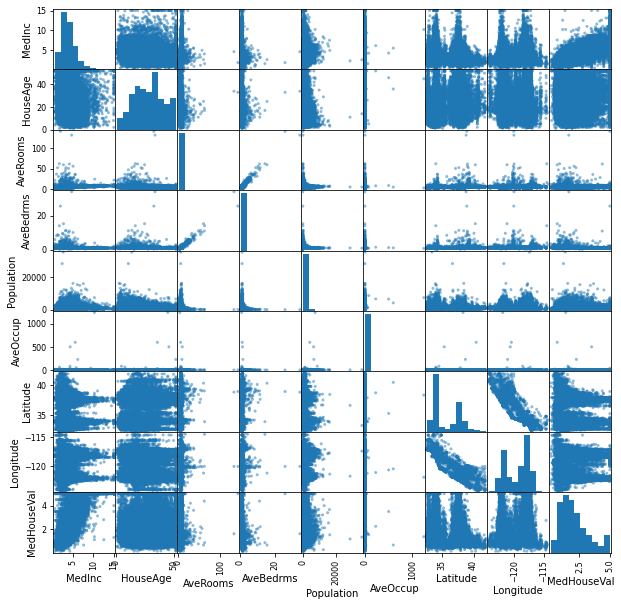

In [28]:
import pandas as pd

fullDF = [dataDF, targetDF]
fullDF = pd.concat(fullDF, axis=1)

pd.plotting.scatter_matrix(fullDF, figsize=(10.0, 10.0));


With this graphing tool, we can easily see the general pattern as to which feature affects the MedHouseVal feature. This visual supports our earlier calculations as well, as we can see that the scatterplot for AveBedrmsxMedHouseVal is not necessarily linear nor does it seem to follow any pattern that can help with predictions.

---
#### 6. While our plots helped gain some insight, the overall appearance of the chart seems to be a bit crowded. Therefore, we can attempt to clear up some of it by only using a `sample()` of 1% of the data collected. So we will do that and plot the matrix again below:

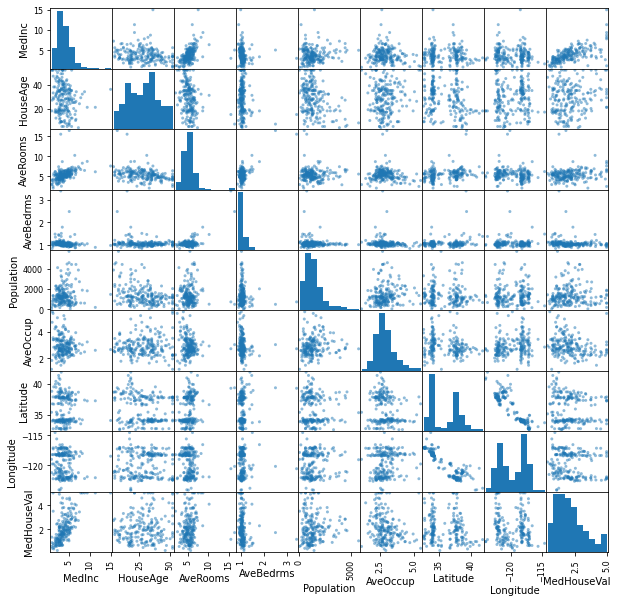

In [29]:
sampleDF = fullDF.sample(frac=0.01, random_state=(2021-3-25))

pd.plotting.scatter_matrix(sampleDF, figsize=(10.0, 10.0));


After plotting the sample size, it is much easier to see typical trends/patterns between each feature. However, our previous observation still stands in that there is not much correlation between AveBedrmsxMedHouseVal. It seems that regardless of the average number of bedrooms in a home, we still see the median house value can either be high or low for a given home in California. This also explains our values for $R^2$ from earlier. As stated, we cannot safely predict the median house value simply from the number of bedrooms, therefore the coefficient of determination will be low to represent this fact.

---
#### 7. So which features have the strongest linear relationship with MedHouseVal?
From our sample matrix, it is visible that there are a few features that have stronger, linear trends when compared against MedHouseVal. For example, two features that have a somewhat linear relationship would be **Population** and **HouseAge**. While not the strongest relationship, we at least see that there is somewhat of a correlation. For example, HouseAge may be fairly scattered, but the concentration of plot points does trend upward when the MedHouseVal increases. This is the same for Population as well.

However, the strongest relation would certainly be ***MedInc***. It seems as the Median Income of an area increases, the house value almost directly correlates with that increase. This seems especially so given the fact that the data points are strongly clustered together.

---
#### 8. How about the relationship between Latitude/Longitude and MedHouseVal?
If one were to view the latitude and longitude data, there would be quite an interesting distinction in that there are two straight bars of clustered data points on the sample data matrix. This fits suitably when compared against a map of California, as the estimated values of the latitude/longitude bars generally correlate to the Los Angeles Metropolitan Area and the San Francisco Bay Area, infamously known as two of the more expensive areas to live and own homes in the state.

How about we try plotting the points just to be sure?

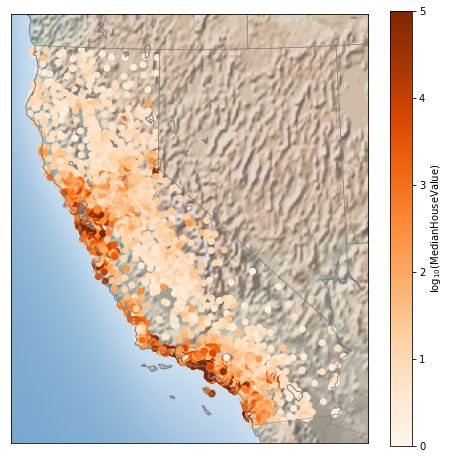

In [53]:
'''
Using Basemap tutorial from:
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html#Example:-California-Cities
'''

from mpl_toolkits.basemap import Basemap

lat = dataDF['Latitude'].values
lon = dataDF['Longitude'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting median house value
m.scatter(lon, lat, latlon=True,
          c=medValData,
          cmap='Oranges', alpha=1)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm Median House Value})$')
plt.clim(0, 5)


And as predicted, we see that the trend for higher median home values seems to correlate with the Bay Area and Los Angeles, as our plot points get darker near both geographic areas.

---
#### 9. Moving from our predictions, we will now calculate the correlation matrix between the features to see which correlates the strongest with MedHouseVal.

In [54]:
fullDF.corr(method='pearson')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Based on the correlation matrix we created, we see that the value that has the highest correlation would be MedInc (0.688075). This is a pretty high correlation, and based off of our analysis on Step 7, it seems we were correct in believing that the median income has the highest, linear correlation with the median value of a house in California.

---
#### 10. We will now replicate the experiment from Step 4, but use the data from the MedInc attribute instead for a Linear Regression model and see how that compares.

In [58]:
# Create linear regression of MedInc and MedHouseVal
medIncData = dataDF['MedInc'].values
medIncData = np.vstack(medIncData)

medIncRegression = LinearRegression().fit(medIncData, medValData)

# Find MSE for MedInc linear regression
medIncTestSet = featuresTest['MedInc'].values
medIncTestSet = np.vstack(medIncTestSet)
medIncTrainSet = featuresTrain['MedInc'].values
medIncTrainSet = np.vstack(medIncTrainSet)

medIncTestPredictions = medIncRegression.predict(medIncTestSet)
medIncTrainPredictions = medIncRegression.predict(medIncTrainSet)

medIncTestMSE = mean_squared_error(y_true=np.vstack(targetTest.values),
                                  y_pred=medIncTestPredictions)
medIncTrainMSE = mean_squared_error(y_true=np.vstack(targetTrain.values),
                                   y_pred=medIncTrainPredictions)

print('MedInc test set MSE: ', medIncTestMSE)
print('MedInc training set MSE: ', medIncTrainMSE)

# Calculate R^2
medIncTrainRSquared = medIncRegression.score(medIncTrainSet, np.vstack(targetTrain.values))
medIncTestRSquared = medIncRegression.score(medIncTestSet, np.vstack(targetTest.values))

print('\nCoefficient of determination for test set (MedInc): ', medIncTestRSquared)
print('Coefficient of determination for training set (MedInc): ', medIncTrainRSquared)


MedInc test set MSE:  0.671993332314747
MedInc training set MSE:  0.7084156047875041

Coefficient of determination for test set (MedInc):  0.4951330274250022
Coefficient of determination for training set (MedInc):  0.468028593998157


After creating the new Linear Regression model based off of MedInc, we see that the resulting $R^2$ values from a `score()` of the model is much higher than our previous values. This means that we can more comfortably claim that the median income of an area may "explain" the median house value much better than the number of bedrooms.

---
#### 11. Let's go ahead and perform everything from the previous step, but use the entire set of features this time and compare the training and test MSE values to the previous ones found.

In [63]:
# Create linear regression of all features and MedHouseVal
fullData = dataDF.values
fullData = np.vstack(fullData)
fullDataRegression = LinearRegression().fit(fullData, medValData)

# Find MSE for full data linear regression
fullDataTestSet = featuresTest.values
fullDataTestSet = np.vstack(fullDataTestSet)
fullDataTrainSet = featuresTrain.values
fullDataTrainSet = np.vstack(fullDataTrainSet)

fullDataTestPredictions = fullDataRegression.predict(fullDataTestSet)
fullDataTrainPredictions = fullDataRegression.predict(fullDataTrainSet)

fullDataTestMSE = mean_squared_error(y_true=np.vstack(targetTest.values),
                                  y_pred=fullDataTestPredictions)
fullDataTrainMSE = mean_squared_error(y_true=np.vstack(targetTrain.values),
                                   y_pred=fullDataTrainPredictions)

print('All features test set MSE: ', fullDataTestMSE)
print('All features training set MSE: ', fullDataTrainMSE)

# Calculate R^2
fullDataTrainRSquared = fullDataRegression.score(fullDataTrainSet, np.vstack(targetTrain.values))
fullDataTestRSquared = fullDataRegression.score(fullDataTestSet, np.vstack(targetTest.values))

print('\nCoefficient of determination for test set (all features): ', fullDataTestRSquared)
print('Coefficient of determination for training set (all features): ', fullDataTrainRSquared)


All features test set MSE:  0.5017020848140331
All features training set MSE:  0.5299757115272508

Coefficient of determination for test set (all features):  0.6230724316532521
Coefficient of determination for training set (all features):  0.602024683670616


After creating the Linear Regression model based off of all the features, we see that the MSE values are lower for this model. They are a decent amount lower than the AveBedrm data set, and even lower than the MedInc set. However, the values are still pretty similar to the MSE of MedInc, therefore we can conclude that using only MedInc for our prediction model is actually pretty good compared to AveBedrm.

---
#### 12. We will again attempt to fit a linear model, but this time we will use the `fit_transform()` method to create a degree-2 polynomial model. WIth this, we will then analyze the training and test MSE resulting from this experiment.

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

fullDataInteraction = poly.fit_transform(fullData)
fullDataInteractionReg = LinearRegression().fit(fullDataInteraction, medValData)

fullTrainingDataInteraction = poly.fit_transform(fullDataTrainSet)
fullTestDataInteraction = poly.fit_transform(fullDataTestSet)

fullTrainingInteractionPredictions = fullDataInteractionReg.predict(fullTrainingDataInteraction)
fullTestInteractionPredictions = fullDataInteractionReg.predict(fullTestDataInteraction)

fullTrainingInteractionAvgLoss = mean_squared_error(y_true=np.vstack(targetTrain.values),
                                                    y_pred=fullTrainingInteractionPredictions)

fullTestInteractionAvgLoss = mean_squared_error(y_true=np.vstack(targetTest.values),
                                                y_pred=fullTestInteractionPredictions)

print('Average loss for test data with interactions: ', fullTestInteractionAvgLoss)
print('Average loss for training data with interactions: ', fullTrainingInteractionAvgLoss)


Average loss for test data with interactions:  0.4041405560034334
Average loss for training data with interactions:  0.4260962818740656


As we can see, our MSE values have gone down even further by adding a polynomial order to our model. This is as expected -- however, we must be wary of overfitting the model too much by using a combination of all features AND increased polynomial order. While it is not apparent that this is happening here (this would mean the test MSE becomes higher than the training MSE), it is still a valid possibility to occur.

---
#### 13. For our final experiment, we will try penalizing large coefficient values in our model. This will be performed with a call to the Ridge Regression model provided by `sklearn.linear_model` creating an L2-regularization.

In [75]:
from sklearn.linear_model import Ridge
ridgeRegression = Ridge(normalize=True).fit(fullDataInteraction, medValData)

ridgeTrainingPredictions = ridgeRegression.predict(fullTrainingDataInteraction)
ridgeTestPredictions = ridgeRegression.predict(fullTestDataInteraction)

ridgeTrainingAvgLoss = mean_squared_error(y_true=np.vstack(targetTrain.values),
                                        y_pred=ridgeTrainingPredictions)

ridgeTestAvgLoss = mean_squared_error(y_true=np.vstack(targetTest.values),
                                    y_pred=ridgeTestPredictions)

print('Average loss for test data with ridge regression: ', ridgeTestAvgLoss)
print('Average loss for training data with ridge regression: ', ridgeTrainingAvgLoss)


Average loss for test data with ridge regression:  0.6120560760970372
Average loss for training data with ridge regression:  0.6468760838638015


As is noticeable, the MSE values for the ridge regression model is actually slightly higher than the previous, polynomial-order model. However, this does not necessarily mean that the MSE values are "bad." Sometimes, one would not want their model's MSE values be too close to 0, because this could be an indicator that the model may be *overfitting* the data and will perform poorly when predicting new data that is introduced. Interestingly enough, these MSE values are similar to the $R^2$ values we found earlier. This makes sense, as these values tend to be closely related; considering the fact that their values are similar when using the ridge regression model, it is likely that the ridge regression model would be our best choice of making predictions for this data set.

---
# Summary and Closing Observations

Using "real-world" data helped validate our experiments' findings as we attempted to create models for predicting median home values in California. This is certainly visible in the step involving plotting the points onto the map of the state, where we could directly confirm the assumption of where median home values are the highest. Overall, it seemed as if though "splitting the difference" by using a Ridge Regression model worked best in this project as it obtained MSE values similar to our $R^2$ findings. Therefore, we can conclude that given all features of the original data set, an L2 Ridge Regression model could be the best predictor of the median value of a home in California.